<a href="https://colab.research.google.com/github/AmanDesai-coder/stock-analysis/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import pandas as pd


# New Section

In [2]:
stock_symbol = "AAPL"
stocks = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol="+stock_symbol+"&apikey=HID1RNPI5SK189KB&datatype=csv&datatype=csv")
stocks


,timestamp,open,high,low,close,volume
0,2022-01-07,172.89,174.14,171.03,172.17,86709147
1,2022-01-06,172.70,175.30,171.64,172.00,96903955
2,2022-01-05,179.61,180.17,174.64,174.92,94537602
3,2022-01-04,182.63,182.94,179.12,179.70,99310438
4,2022-01-03,177.83,182.88,177.71,182.01,104701220
...,...,...,...,...,...,...
5579,1999-11-05,84.62,88.37,84.00,88.31,3721500
5580,1999-11-04,82.06,85.37,80.62,83.62,3384700
5581,1999-11-03,81.62,83.25,81.00,81.50,2932700
5582,1999-11-02,78.00,81.69,77.31,80.25,3564600


In [3]:
#data = stocks[['Open', 'Low', 'Close', 'Volume']].to_numpy()
fraction = 0.2
input_data = stocks[['open', 'low']].to_numpy()

training_x = input_data[int(len(input_data)*fraction):]
#training_x = input_data[:]
training_x_max = np.max(training_x, axis = 0)

testing_x = input_data[:int(len(input_data)*fraction)]

training_x = training_x/training_x_max
#testing_x = testing_x/training_x_max


result_data = stocks[['high']].to_numpy()

training_y = result_data[int(len(input_data)*fraction):]
#training_y = result_data[:]
training_y_max = np.max(training_y, axis = 0)

testing_y = result_data[:int(len(input_data)*fraction)]

training_y = training_y/training_y_max
#testing_y = testing_y/training_y_max
testing_x

array([[172.89  , 171.03  ],
       [172.7   , 171.64  ],
       [179.61  , 174.64  ],
       ...,
       [158.6   , 158.27  ],
       [157.06  , 156.6701],
       [156.07  , 155.69  ]])

In [4]:
def build_predictive_model(x_train, y_train):  
  layer_1 = tf.keras.layers.Dense(16, input_shape = [2], activation = tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal')
  layer_2 = tf.keras.layers.Dropout(0.3)
  layer_3 = tf.keras.layers.Dense(32)
  layer_4 = tf.keras.layers.Dense(16, activation = tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal')
  layer_5 = tf.keras.layers.Dense(4, activation = tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal')
  layer_6 = tf.keras.layers.Dense(1)
  model = tf.keras.Sequential([layer_1, layer_4, layer_5, layer_6])
  model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
  model.fit(x_train, y_train, epochs = 20, verbose= 1, batch_size=32)
  return model


In [5]:

model = build_predictive_model(training_x, training_y)



Epoch 1/20
140/140 [==============================] - 1s 2ms/step - loss: 0.1086 - mean_absolute_error: 0.1086
Epoch 2/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 3/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 4/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 5/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 6/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 7/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 8/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 9/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
E

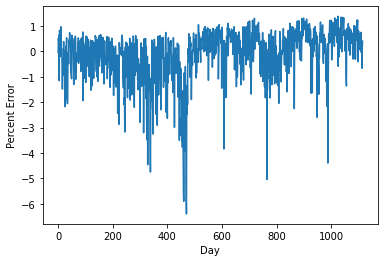

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Day')
ax.set_ylabel('Percent Error')

ax.plot((model.predict(testing_x/training_x_max)*training_y_max-testing_y)/testing_y*100)
plt.show()

In [7]:
avg_diff = np.average((model.predict(testing_x/training_x_max)*training_y_max-testing_y))
avg_percent = np.average((model.predict(testing_x/training_x_max)*training_y_max-testing_y)/testing_y*100)
print(avg_diff)
print("The average difference between predicted and actual stock price is %f" % avg_diff)
print("The average percentage difference between predicted and actual stock price is %f" % avg_percent)

-0.23435370685892046
The average difference between predicted and actual stock price is -0.234354
The average percentage difference between predicted and actual stock price is -0.093544


In [8]:
def predict_from_low(low, open):
  res = model.predict([[low, open]]/training_x_max)*training_y_max
  print("$", res[0][0])
predict_from_low(181.30, 177.19)

$ 182.50888823240996
